 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
pwd

'C:\\Users\\Nick Hugh\\Repos\\Module 4 Challenge'

In [3]:
# Reading whale_returns.csv 
whale_path = Path("./Resources/whale_returns.csv")  
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# re-writing to whale_returns_mod.csv. To avoid problem using whale_returns.csv
Whale_mod_path = Path("./Resources/whale_returns_mod.csv") 
whale_df.to_csv(Whale_mod_path)

# reading whale_returns_mod.csv
whale_df = pd.read_csv(Whale_mod_path, index_col="Date", infer_datetime_format=True, parse_dates=True) 
whale_df.sort_index(ascending=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [4]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [5]:
# check whale returns
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
#delete NaNs
whale_df = whale_df.dropna().copy()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [7]:
# By inspection the first row has no data, delete row
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [8]:
# By inspection data is zero for all columns on a range of rows.  
xeros_df = whale_df.loc[whale_df["SOROS FUND MANAGEMENT LLC"] == 0]
xeros_df.count()

SOROS FUND MANAGEMENT LLC      39
PAULSON & CO.INC.              39
TIGER GLOBAL MANAGEMENT LLC    39
BERKSHIRE HATHAWAY INC         39
dtype: int64

In [9]:
# Recreate whale_df to exclude zero rows 
whale_df = whale_df.loc[whale_df["SOROS FUND MANAGEMENT LLC"] != 0]
whale_df.loc[whale_df["SOROS FUND MANAGEMENT LLC"] == 0].count()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [10]:
# Drop nulls
whale_df.dropna().copy()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [11]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [12]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")#Path("C:/Users/Nick Hugh/Repos/Module 4 Challenge/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True) 
algo_df.sort_index(ascending=True)
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [13]:
# Count nulls
algo_df.isnull().sum()
algo_df.dtypes


Algo 1    float64
Algo 2    float64
dtype: object

In [14]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


In [15]:
# Check for zero filled rows
algo_df[(algo_df["Algo 1"]==0) & (algo_df["Algo 2"]==0)].count()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [16]:
# Reading S&P TSX 60 Closing Prices
tsx_path = Path("./Resources/sp_tsx_history.csv")#Path("C:/Users/Nick Hugh/Repos/Module 4 Challenge/Resources/sp_tsx_history.csv")
tsx_df = pd.read_csv(tsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True) 
tsx_df = tsx_df.sort_index(ascending=True)


In [17]:
# Check Data Types
tsx_df.dtypes

Close    object
dtype: object

In [18]:
# Fix Data Types
tsx_df['Close'] = tsx_df['Close'].str.replace('$', '')
tsx_df['Close'] = tsx_df['Close'].str.replace(',', '')

C:\Users\Nick Hugh\AppData\Local\Temp\ipykernel_23952\2309346413.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tsx_df['Close'] = tsx_df['Close'].str.replace('$', '')


In [19]:
# save to new csv file and reload
tsx_out_path = Path("./Resources/sp_tsx_history_mod.csv")#Path("C:/Users/Nick Hugh/Repos/Module 4 Challenge/Resources/sp_tsx_history_mod.csv")
tsx_df.to_csv(tsx_out_path)

tsx_path = Path("./Resources/sp_tsx_history_mod.csv")#Path("C:/Users/Nick Hugh/Repos/Module 4 Challenge/Resources/sp_tsx_history_mod.csv")
tsx_df = pd.read_csv(tsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True) 
tsx_df = tsx_df.sort_index(ascending=True)
tsx_df.dtypes


Close    float64
dtype: object

In [20]:
# Check nulls
tsx_df.isnull().sum()


Close    0
dtype: int64

In [21]:
# Drop nulls
tsx_df.dropna()


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [22]:
# Rename `Close` Column to be specific to this portfolio.
tsx_df = tsx_df.rename(columns={'Close': 'TSX'})


In [23]:
# Calculate Daily Returns
tsx_pct_df = tsx_df.pct_change()
tsx_pct_df


,TSX
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [24]:
# check nulls
tsx_pct_df.isna().sum()

TSX    1
dtype: int64

In [25]:
tsx_pct_df.dropna()

,TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [26]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df,algo_df,tsx_pct_df], axis='columns', join='inner')
combined_df.set_index="Date"
combined_df.sort_index()

# for simplicity 
combined_df = combined_df.rename(columns={'SOROS FUND MANAGEMENT LLC': 'SOROS'})
combined_df = combined_df.rename(columns={'TIGER GLOBAL MANAGEMENT LLC': 'TIGER'})
combined_df = combined_df.rename(columns={'BERKSHIRE HATHAWAY INC': 'BERKSHIRE'})
combined_df = combined_df.rename(columns={'PAULSON & CO.INC. ': 'PAULSON'})


combined_df

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [27]:
combined_df.columns

Index(['SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE', 'Algo 1', 'Algo 2', 'TSX'], dtype='object')

<Axes: xlabel='Date'>

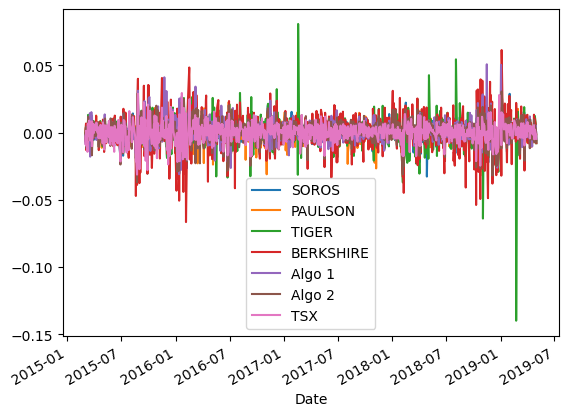

In [28]:
# Plot daily returns of all portfolios
combined_df.plot()



#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

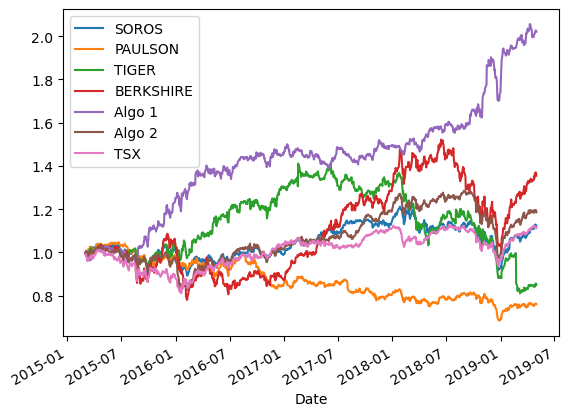

In [29]:
# Calculate cumulative returns of all portfolios
Cumprod_df = pd.DataFrame()
Cumprod_df = (1 + combined_df).cumprod()

Cumprod_df.plot()



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

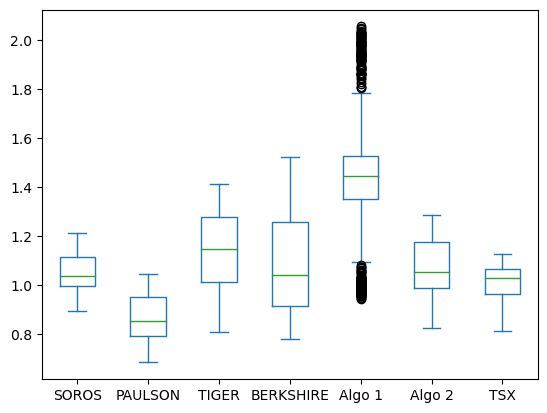

In [30]:
# Box plot to visually show risk
Cumprod_df.plot(kind="box")


### Calculate Standard Deviations

In [31]:
# Calculate the daily standard deviations of all portfolios
std_df = Cumprod_df.std()


### Determine which portfolios are riskier than the S&P TSX 60

In [32]:
# Calculate  the daily standard deviation of S&P TSX 60
std_df.sort_values()



SOROS        0.070320
TSX          0.073243
PAULSON      0.090715
Algo 2       0.112156
TIGER        0.149071
BERKSHIRE    0.196995
Algo 1       0.256136
dtype: float64

### Calculate the Annualized Standard Deviation

In [33]:
# Calculate the annualized standard deviation (252 trading days)
Cumprod_df.std() * np.sqrt(252)


SOROS        1.116297
PAULSON      1.440055
TIGER        2.366424
BERKSHIRE    3.127201
Algo 1       4.066041
Algo 2       1.780416
TSX          1.162703
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

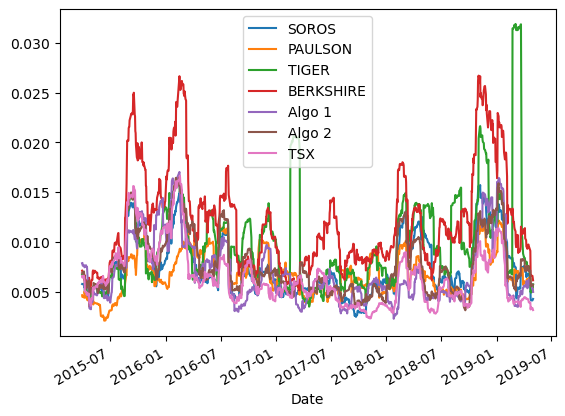

In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot()


### Calculate and plot the correlation

In [35]:
# Calculate the correlation
corr_df = combined_df.corr()

# Display the correlation matrix
corr_df


,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,TSX
SOROS,1.000000,0.697109,0.560972,0.750178,0.315982,0.840957,0.684439
PAULSON,0.697109,1.000000,0.433033,0.540079,0.268353,0.685653,0.494409
TIGER,0.560972,0.433033,1.000000,0.423538,0.162407,0.515437,0.447586
BERKSHIRE,0.750178,0.540079,0.423538,1.000000,0.291364,0.696456,0.565851
Algo 1,0.315982,0.268353,0.162407,0.291364,1.000000,0.283138,0.307950
Algo 2,0.840957,0.685653,0.515437,0.696456,0.283138,1.000000,0.740503
TSX,0.684439,0.494409,0.447586,0.565851,0.307950,0.740503,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [36]:
#Calculate covariance of a single portfolio
Covar_Soros_with_TSX = combined_df["SOROS"].cov(combined_df["TSX"])
# Calculate variance of S&P TSX
var_TSX = combined_df["TSX"].var()
# Computing beta
SOROS_Beta = Covar_Soros_with_TSX / var_TSX
SOROS_Beta
print(f"SOROS_Beta = {SOROS_Beta:.2f}")

Covar_Soros_with_TSX = combined_df["PAULSON"].cov(combined_df["TSX"])
# Calculate variance of S&P TSX
var_TSX = combined_df["TSX"].var()
# Computing beta
PAULSON_Beta = Covar_Soros_with_TSX / var_TSX
print(f"PAULSON_Beta = {PAULSON_Beta:.2f}")

Covar_Soros_with_TSX = combined_df["TIGER"].cov(combined_df["TSX"])
# Calculate variance of S&P TSX
var_TSX = combined_df["TSX"].var()
# Computing beta
TIGER_Beta = Covar_Soros_with_TSX / var_TSX
print(f"TIGER_Beta = {TIGER_Beta:.2f}")

Covar_Soros_with_TSX = combined_df["BERKSHIRE"].cov(combined_df["TSX"])
# Calculate variance of S&P TSX
var_TSX = combined_df["TSX"].var()
# Computing beta
BERKSHIRE_Beta = Covar_Soros_with_TSX / var_TSX
print(f"BERKSHIRE_Beta = {BERKSHIRE_Beta:.2f}")

Covar_Soros_with_TSX = combined_df["Algo 1"].cov(combined_df["TSX"])
# Calculate variance of S&P TSX
var_TSX = combined_df["TSX"].var()
# Computing beta
Algo1_Beta = Covar_Soros_with_TSX / var_TSX
print(f"Algo1_Beta = {Algo1_Beta:.2f}")

Covar_Soros_with_TSX = combined_df["Algo 2"].cov(combined_df["TSX"])
# Calculate variance of S&P TSX
var_TSX = combined_df["TSX"].var()
# Computing beta
Algo2_Beta = Covar_Soros_with_TSX / var_TSX
print(f"Algo2_Beta = {Algo2_Beta:.2f}")

Covar_TSX_with_TSX = combined_df["TSX"].cov(combined_df["TSX"])
# Calculate variance of S&P TSX
var_TSX = combined_df["TSX"].var()
# Computing beta
TSX_Beta = Covar_TSX_with_TSX / var_TSX
print(f"TSX_Beta = {TSX_Beta:.2f}")



SOROS_Beta = 0.77
PAULSON_Beta = 0.50
TIGER_Beta = 0.70
BERKSHIRE_Beta = 1.05
Algo1_Beta = 0.34
Algo2_Beta = 0.88
TSX_Beta = 1.00


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

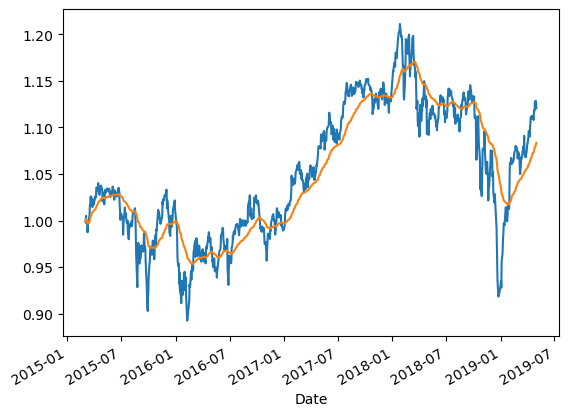

In [37]:
# Use `ewm` to calculate the rolling window
ax = Cumprod_df["SOROS"].plot()
Cumprod_df["SOROS"].ewm(halflife = 21).mean().plot(ax=ax)


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Annualized Sharpe Ratios
avg_daily_bill_return = 2.0 /36500 # average daily return over 2015 - 2019

combined_pct_df = combined_df.pct_change().dropna();
combined_mean_returns_df = combined_pct_df.mean() * np.sqrt(252)
combined_stds_df = combined_pct_df.std()

excess_returns = combined_mean_returns_df - avg_daily_bill_return * np.sqrt(252)
sharp_ratios_df = excess_returns / combined_stds_df
sharp_ratios_df



SOROS        0.208168
PAULSON     -0.993740
TIGER       -2.651306
BERKSHIRE    0.255685
Algo 1      -0.809941
Algo 2       0.274709
TSX          0.380536
dtype: float64

<Axes: >

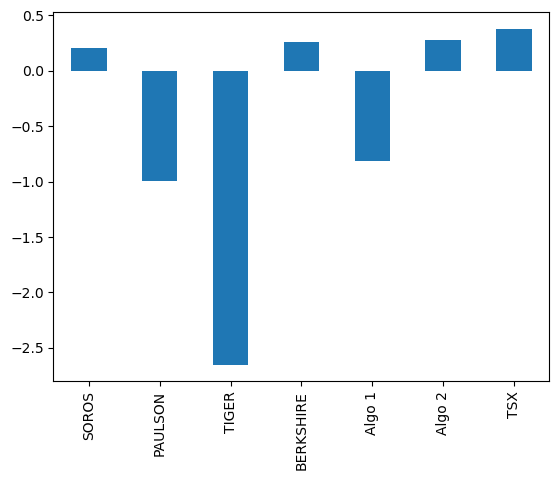

In [71]:
# Visualize the sharpe ratios as a bar plot
sharp_ratios_df.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from BHP
bhp_filepath = Path("C:/Users/Nick Hugh/Repos/Module 4 Challenge/Resources/ASX/BHP.AX.csv")
bhp_daily_df = pd.read_csv(bhp_filepath, index_col = "Date", parse_dates=True, infer_datetime_format=True)
bhp_daily_df = bhp_daily_df.drop(columns=["Open", "High", "Low", "Close", "Volume"])
bhp_daily_df = bhp_daily_df.rename(columns={'Adj Close': 'BHP'})
bhp_daily_df.dropna()

In [ ]:
# Reading data from WESTPAC
wes_filepath = Path("C:/Users/Nick Hugh/Repos/Module 4 Challenge/Resources/ASX/WES.AX.csv")
wes_daily_df = pd.read_csv(wes_filepath, index_col = "Date", parse_dates=True, infer_datetime_format=True)
wes_daily_df = wes_daily_df.drop(columns=["Open", "High", "Low", "Close", "Volume"])
wes_daily_df = wes_daily_df.rename(columns={'Adj Close': 'WESTPAC'})
wes_daily_df.dropna()


In [ ]:
# Reading data from TRANSURBAN
tcl_filepath = Path("C:/Users/Nick Hugh/Repos/Module 4 Challenge/Resources/ASX/TCL.AX.csv")
tcl_daily_df = pd.read_csv(tcl_filepath, index_col = "Date", parse_dates=True, infer_datetime_format=True)
tcl_daily_df = tcl_daily_df.drop(columns=["Open", "High", "Low", "Close", "Volume"])
tcl_daily_df = tcl_daily_df.rename(columns={'Adj Close': 'TRANSURBAN'})
tcl_daily_df.dropna()

In [ ]:
# Reading data from CBA
cba_filepath = Path("C:/Users/Nick Hugh/Repos/Module 4 Challenge/Resources/ASX/CBA.AX.csv")
cba_daily_df = pd.read_csv(cba_filepath, index_col = "Date", parse_dates=True, infer_datetime_format=True)
cba_daily_df = cba_daily_df.drop(columns=["Open", "High", "Low", "Close", "Volume"])
cba_daily_df = cba_daily_df.rename(columns={'Adj Close': 'CBA'})
cba_daily_df.dropna()

In [ ]:
# Reading data from CSL
csl_filepath = Path("C:/Users/Nick Hugh/Repos/Module 4 Challenge/Resources/ASX/CSL.AX.csv")
csl_daily_df = pd.read_csv(csl_filepath, index_col = "Date", parse_dates=True, infer_datetime_format=True)
csl_daily_df = csl_daily_df.drop(columns=["Open", "High", "Low", "Close", "Volume"])
csl_daily_df = csl_daily_df.rename(columns={'Adj Close': 'CSL'})
csl_daily_df.dropna()

In [ ]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([bhp_daily_df,wes_daily_df,tcl_daily_df,cba_daily_df,csl_daily_df], axis="columns",join="inner")
combined_df


In [ ]:
# Reset Date index
combined_df.reset_index()


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns
combined_returns_df = combined_df.pct_change()

# Drop NAs
combined_returns_df = combined_returns_df.dropna()

# Display sample data
combined_returns_df


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

portfolio_returns_df = pd.DataFrame()
portfolio_returns_df["PORTFOLIO"] = combined_returns_df.dot(weights)

portfolio_returns_df


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
combined_Asset_returns_df = pd.concat([combined_returns_df,portfolio_returns_df], axis="columns",join="inner")
combined_Asset_returns_df


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_Asset_returns_df.isna().sum()


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
combined_Asset_returns_df.std() * np.sqrt(252)


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation
combined_Asset_returns_df.rolling(window=21).std().dropna()

# Plot rolling standard deviation
combined_Asset_returns_df.rolling(window=21).std().dropna().plot()

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
combined_Asset_returns_df.dropna().corr()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta

shop_path = Path("./Resources/tsx_shop.csv")#Path("C:/Users/Nick Hugh/Repos/Module 4 Challenge/Resources/tsx_shop.csv")
shop_df = pd.read_csv(shop_path, index_col="Date", infer_datetime_format=True, parse_dates=True, dayfirst=True) 
shop_df.sort_index(ascending=True) 

shop_returns_df = shop_df.pct_change()
shop_returns_df = shop_returns_df.dropna()
shop_returns_df = shop_returns_df.drop(columns=["Open","High","Low","Volume"])
shop_returns_df = shop_returns_df.rename(columns={"Close":"SHOP"})
shop_returns_df

combined_Asset_returns_df = pd.concat([combined_Asset_returns_df,shop_returns_df], axis="columns",join="inner")
combined_Asset_returns_df


In [ ]:
# 60 day rolling beta
rolling_cov_df = combined_Asset_returns_df["PORTFOLIO"].rolling(window=60).cov(combined_Asset_returns_df["SHOP"])
rolling_var_df = combined_Asset_returns_df["SHOP"].var()
beta = rolling_cov_df / rolling_var_df
beta.dropna().plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
# using daily us 3m bill rates to calculate an estimate of the risdl free return 
riskfree_path = Path("./Resources/usd_3m_tbill_rates.csv")#Path("C:/Users/Nick Hugh/Repos/Module 4 Challenge/Resources/usd_3m_tbill_rates.csv")
riskfree_df = pd.read_csv(riskfree_path, index_col="Date", infer_datetime_format=True, parse_dates=True, dayfirst=True) 
riskfree_df = riskfree_df.dropna()

riskfree_returns_df = riskfree_df / 36500 # an estimate of the one day return 
riskfree_returns_df = riskfree_returns_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
riskfree_returns_df = riskfree_returns_df.rename(columns={"Close":"3M BILL"})
combined_Asset_returns_df = pd.concat([combined_Asset_returns_df,riskfree_returns_df], axis="columns",join="inner")
combined_Asset_returns_df




In [ ]:
Asset_Returns_df = combined_Asset_returns_df.mean().dropna() 

Asset_stds_df = combined_Asset_returns_df.std()

excess_returns = Asset_Returns_df - Asset_Returns_df["3M BILL"].mean()

sharp_df = excess_returns / Asset_stds_df
print(sharp_df)


In [ ]:
# Visualize the sharpe ratios as a bar plot
sharp_df.plot(kind="bar", title="sharp ratios over the period 26 Jul 22 to 24 Jul 23")

### How does your portfolio do?

Write your answer here!

In [ ]:
The very modest "PORTFOLIO" Sharp ratio suggest positive value adding over the risk free rate, albeit at a very modest rate.
CSL and TRANSURBAN on average returned less than the risk free rate which is not surprising considering their strength over 
previous periods. The "SHOP" portfolio shows vaue added over the period.
This analysis is over a limited period and should not in itself be an indicator of future performance